# 랭그래프 기본 원리 익히기

## 필요 라이브러리 설치

In [21]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


## 필요 라이브러리 불러오기

In [22]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

## 상태 정의
- `TypedDict` : Python의 딕셔너리에 타입 힌트를 추가하기 위한 기능
- 클래스 정의 문법을 사용하지, 실제 딕셔너리 구조를 가짐

In [23]:
class CounterState(TypedDict):
    count: int

## 노드 함수 정의

In [24]:
# 카운트를 1 증가시키는 노드가 될 함수
def first_increment(state):
    print("첫 번째 증가")
    return {"count": state["count"] + 1}

In [25]:
# 카운트를 10 증가시키는 노드가 될 함수
def second_increment(state):
    print("두 번째 증가")
    return {"count": state["count"] + 10}

## 그래프 정의
- StateGraph를 생성할 때 상태의 스키마로 CounterState 전달
- 그래프가 처리할 데이터의 형태를 정의

In [26]:
graph = StateGraph(CounterState)
graph.add_node("first", first_increment) # 그래프에 노드 추가
graph.add_node("second", second_increment) # 그래프에 노드 추가

## 엣지 정의
- 노드 간 실행 순서 정의
- START -> first -> second -> END

In [27]:
graph.add_edge(START, "first")
graph.add_edge("first", "second")
graph.add_edge("second", END)

## 컴파일
- 정의된 그래프 구조를 실행 가능한 애플리케이션으로 변환

In [28]:
app = graph.compile()

## 시각화
- Mermaid 다이어그램을 사용하여 그래프 구조 시각화

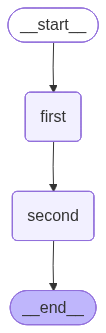

In [29]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 그래프 실행

In [30]:
result = app.invoke({"count": 0}) #초기 상태 정의하여 실행
print(f"최종 결과: {result}")

첫 번째 증가
두 번째 증가
최종 결과: {'count': 11}
